# 数值属性概念分层

In [22]:
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [23]:
df = pd.read_csv('../../data/缺失值处理后数据.csv')
df.head()

,Unnamed: 0,j_name,c_name,c_nature,c_scale,description,w_place,w_field,w_experience,education,s_min,s_max,vacancies,welfare
0,0,华为海外大数据分析,纳沃克斯(北京)国际咨询有限公司 Networkers International,外商独资,20-99人,岗位职责：1、使用数据统计、挖掘工具，对收集到的运营商数据进行多维度数据，进行整理、分析、建...,其他,通信技术工程师,3-5年,不限,20.0,30.0,1.0,"五险一金,年底双薪,加班补助,全勤奖,交通补助,餐补,房补,通讯补贴"
1,1,华为海外大数据分析工程师,RIZE World Wide LTD,外商独资,20-99人,海外大数据分析工程师1有微软，IBM，华为，亚马逊，阿里巴巴，腾讯，百度等大型公司工作经验优...,其他,IT技术支持/维护经理,3-5年,本科,50.0,70.0,20.0,"五险一金,绩效奖金,年终分红,包住,交通补助,通讯补贴,带薪年假,节日福利"
2,3,华为海外大数据挖掘,纳沃克斯(北京)国际咨询有限公司 Networkers International,外商独资,20-99人,岗位职责：1、使用数据统计、挖掘工具，对收集到的运营商数据进行多维度数据，进行整理、分析、建...,其他,IT技术支持/维护工程师,5-10年,不限,20.0,30.0,1.0,"五险一金,年底双薪,加班补助,全勤奖,交通补助,餐补,房补,通讯补贴"
3,5,产品经理(舆情，大数据)-00708,任子行网络技术股份有限公司,上市公司,500-999人,岗位职责1、分析总结市场用户需求，设计产品原型；2、与技术直接对接，跟踪产品开发进度；3、分...,其他,互联网产品经理/主管,3-5年,本科,10.0,20.0,5.0,"节日福利,五险一金,绩效奖金,餐补,带薪年假,定期体检"
4,8,（菲律宾）Java工程师,深圳市兴东企业管理有限公司,民营,100-499人,1、本科以上学历，计算机相关专业，5年及以上企业级j2ee应用开发经验2、精通Java核心技...,其他,Java开发工程师,5-10年,本科,20.0,30.0,3.0,"14薪,周末双休,绩效奖金,加班补助,包住,包吃,带薪年假,节日福利"


In [24]:
df.drop(df.columns[0],axis=1, inplace = True)

In [25]:
df[df['s_min']!=df['s_max']].shape

(19785, 13)

In [26]:
df['s_average'] = (df.s_min + df.s_max) / 2

In [27]:
df.to_csv('../../data/origin_with_average_salary.csv',index=False)

In [28]:
def s_min_delamination(salary):
    salary_map = lambda x: {
        x <= 6 : 'l1',
        6 < x <= 10 : 'l2',
        10 < x <= 16 : 'l3',
        x > 16 : 'l4',
    }
    return salary_map(salary)[True]

def s_max_delamination(salary):
    salary_map = lambda x: {
        x <= 6 : 'h1',
        6 < x <= 10 : 'h2',
        10 < x <= 16 : 'h3',
        x > 16 : 'h4',
    }
    return salary_map(salary)[True]

def s_average_delamination(salary):
    salary_map = lambda x: {
        x <= 6 : 'a1',
        6 < x <= 10 : 'a2',
        10 < x <= 16 : 'a3',
        x > 16 : 'a4',
    }
    return salary_map(salary)[True]

def vacancies_delamination(vacancies):
    vacancies_map = lambda x: {
        x <= 1 : 'v1',
        1 < x <= 5 : 'v2',
        x > 5 : 'v3',
    }
    return vacancies_map(vacancies)[True]

In [29]:
def delamination(ddf, f, column_name):
    lst = []
    for i in ddf[column_name].values:
        lst.append(f(i))
    ddf[column_name] = lst


In [30]:
df_cpy = df.copy()
delamination(df_cpy, s_min_delamination, 's_min')
delamination(df_cpy, s_max_delamination, 's_max')
delamination(df_cpy, s_average_delamination, 's_average')
delamination(df_cpy, vacancies_delamination, 'vacancies')

In [31]:
df_cpy.to_csv('../../data/transformation_with_average_salary.csv',index=False)

In [32]:
# pd.read_csv('../../data/分层后数据.csv')

Text(0.5, 1.0, 'S_average After')

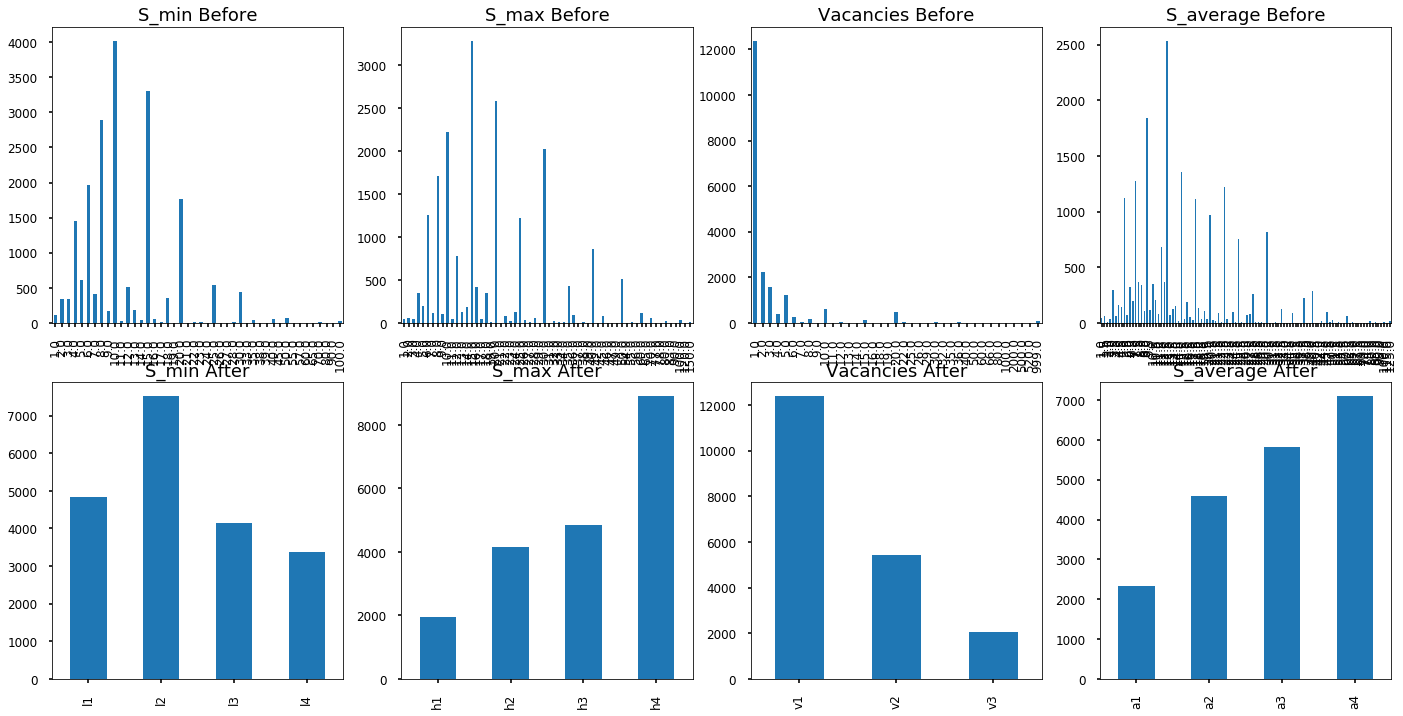

In [33]:
style.use('seaborn-poster')
fig, axarr = plt.subplots(2, 4, figsize=(24, 12))
df['s_min'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12
)
axarr[0][0].set_title('S_min Before', fontsize=18)
df_cpy['s_min'].value_counts().sort_index().plot.bar(
    ax=axarr[1][0], fontsize=12
)
axarr[1][0].set_title('S_min After', fontsize=18)

df['s_max'].value_counts().sort_index().plot.bar(
    ax=axarr[0][1], fontsize=12
)
axarr[0][1].set_title('S_max Before', fontsize=18)
df_cpy['s_max'].value_counts().sort_index().plot.bar(
    ax=axarr[1][1], fontsize=12
)
axarr[1][1].set_title('S_max After', fontsize=18)

df['vacancies'].value_counts().sort_index().plot.bar(
    ax=axarr[0][2], fontsize=12
)
axarr[0][2].set_title('Vacancies Before', fontsize=18)
df_cpy['vacancies'].value_counts().sort_index().plot.bar(
    ax=axarr[1][2], fontsize=12
)
axarr[1][2].set_title('Vacancies After', fontsize=18)
df['s_average'].value_counts().sort_index().plot.bar(
    ax=axarr[0][3], fontsize=12
)
axarr[0][3].set_title('S_average Before', fontsize=18)
df_cpy['s_average'].value_counts().sort_index().plot.bar(
    ax=axarr[1][3], fontsize=12
)
axarr[1][3].set_title('S_average After', fontsize=18)